In [73]:
# load JSON
import json
import pandas as pd

df = pd.read_pickle('franklin-d-roosevelt/airQualityDataframe-franklin-d-roosevelt-PM10.pkl')
df = df.sort_values(by=['ds'])

df1 = df

In [74]:
# Load the Pandas libraries with alias 'pd' 
df = pd.read_pickle('groundLevel/airQualityDataframe-ELYS.pkl')
df = df.sort_values(by=['ds'])

df2 = df
test = df2.y
test = test.astype(float)
df2.y = test

In [75]:
# merge two dataframes matching
df_merge = df1.merge(df2, left_on='ds', right_on='ds', how='outer')

Text(0, 0.5, 'PM10,street')

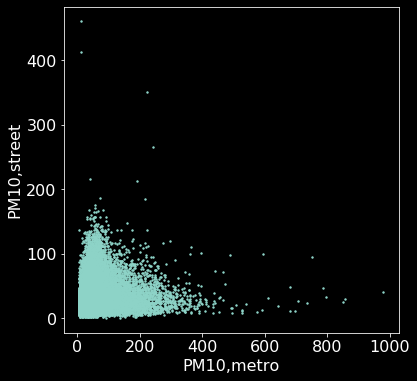

In [76]:
import matplotlib.pyplot as plt
import matplotlib

font = {'size': 16,             # font setting
       'weight':'normal'}       # font setting
matplotlib.rc('font', **font)   # font setting

plt.figure(figsize=(6, 6))
plt.scatter(df_merge['y_x'],df_merge['y_y'],2)
plt.xlabel('PM10,metro')
plt.ylabel('PM10,street')

89.68133690756385
0.10744356291771434
48333


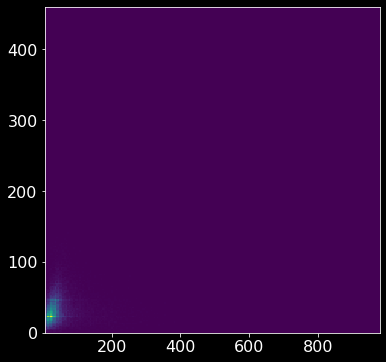

In [127]:
# drop nan's from merged array
df_merge = df_merge.dropna() # drop nan's (any rows with at least 1 NaN)

# covariance / correlation 
val = df_merge.y_x.cov(df_merge.y_y)
print(val)
val = df_merge.y_x.corr(df_merge.y_y)
print(val)

# 2D histogram
print(len(df_merge))
plt.figure(figsize=(6, 6))
hist2dArr = plt.hist2d(df_merge['y_x'], df_merge['y_y'], bins=220)  # sqrt(48333)

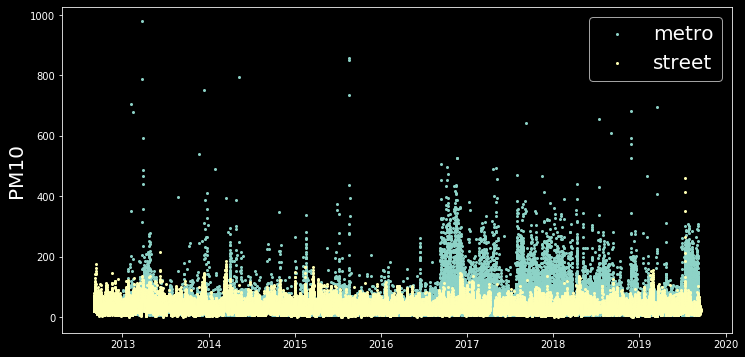

In [38]:
import matplotlib.pyplot as plt
pd.plotting.register_matplotlib_converters() # this resolves some issues with data type

plt.style.use('dark_background')
#from matplotlib import rcParams
#rcParams['font.family'] = 'sans-serif'
#rcParams['font.sans-serif'] = ['Tahoma']
 
plt.figure(figsize=(12, 6))
plt.scatter(df1.ds,df1.y,4)
plt.scatter(df2.ds,df2.y,4)
plt.ylabel('PM10',fontsize=20)
plt.legend(['metro','street'],fontsize=20)
#plt.savefig('pickleToData_plotComparison.png',transparent=True)
#plt.ylim(0, 1000)
#plt.savefig('pickleToData_plotComparison_zoom.png',transparent=True)

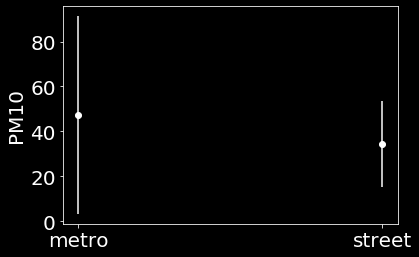

In [39]:
# plot mean +- std
#plt.style.use('dark_background')
 
m1 = pd.DataFrame.mean(df1.y)
m2 = pd.DataFrame.mean(df2.y)
s1 = pd.DataFrame.std(df1.y)
s2 = pd.DataFrame.std(df2.y)

mx1 = pd.DataFrame.max(df1.y)
mn1 = pd.DataFrame.min(df1.y)
mx2 = pd.DataFrame.max(df2.y)
mn2 = pd.DataFrame.min(df2.y)
x = [1,2]
y = [m1,m2]
dy = [s1,s2]
plt.errorbar(x, y, yerr=dy, fmt='ow');

plt.ylabel('PM10',fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(ticks=[1,2], labels=['metro','street'],fontsize=20)
plt.savefig('pickleToData_plotComparison_summary.png',transparent=True)

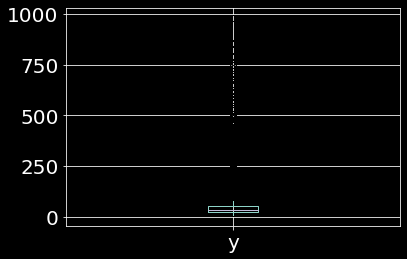

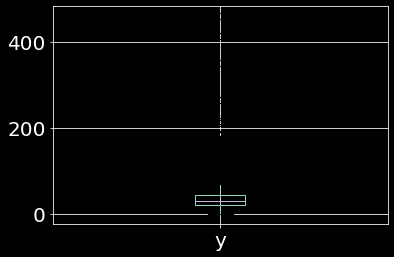

In [44]:
plt.figure(1)
boxplot = df1.boxplot(column=['y'],fontsize=20)
plt.figure(2)
boxplot = df2.boxplot(column=['y'],fontsize=20)